In [3]:
import configparser
import os
import pickle

#from gensim.models import KeyedVectors, TranslationMatrix
import numpy as np
import pandas as pd
#import sktensor
import tensorly as tl


import matplotlib.pyplot as plt
%pylab inline

import logging
logging.basicConfig(level=logging.INFO, 
                    format='%(msecs)d %(levelname)-8s [%(lineno)d] %(message)s')

Populating the interactive namespace from numpy and matplotlib


In [4]:
config = configparser.ConfigParser()                                            
config.read('config.ini')                                                       

['config.ini']

# non-neg Tucker

In [5]:
from eval_tensor import VerbTensorEvaluator

In [6]:
evalor = VerbTensorEvaluator()

In [7]:
evalor.load_embeddings()

In [8]:
tensor = evalor.decomped_tns

In [9]:
core = tensor.core

AttributeError: 'CPTensor' object has no attribute 'core'

In [ ]:
tensor.shape

In [ ]:
core.shape

In [10]:
height = 8
#pylab.rcParams['figure.figsize'] = (2*height, height)

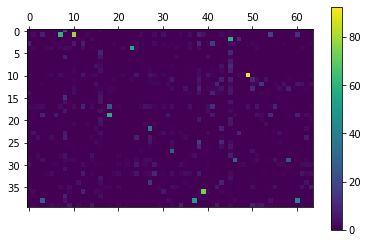

In [12]:
plt.matshow(tensor.factors[1].todense()[:40])
plt.colorbar()
#plt.savefig('/home/makrai/repo/paper/Coling2020/verbtensor/img/nonneg-mx.png')

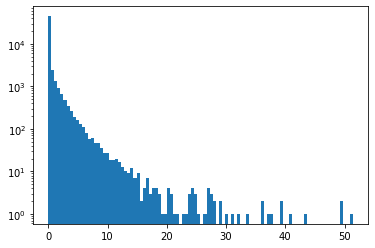

In [17]:
_ = plt.hist(np.sort(tensor.factors[1].todense().reshape(-1))[:-10], log=True, bins=100)
plt.savefig('/home/makrai/repo/paper/MSZNY22/verbtensor/img/nonneg-histg.png')

In [15]:
mode_names = ['nsubj', 'ROOT', 'dobj']

def show_latent(latent_i, mode_i):
    surf_indices = np.argsort(-tensor.factors[mode_i][:,latent_i])
    return latent_i, ', '.join([evalor.index[mode_names[mode_i]].inv[surf_i] for surf_i in surf_indices])

In [16]:
records = []
for i in range(6,16):
    records.append(show_latent(i, 0))
print(pd.DataFrame(records, columns=['dim', 'subjects']).set_index('dim').to_latex())

\begin{tabular}{ll}
\toprule
{} &                                           subjects \\
dim &                                                    \\
\midrule
6   &  system, device, which, program, project, -rrb-... \\
7   &  site, page, website, image, report, post, arti... \\
8   &  Court, court, student, child, Obama, he, membe... \\
9   &  comment, that, user, which, use, it, person, h... \\
10  &  user, you, all, customer, I, i, application, d... \\
11  &  device, system, member, comment, which, post, ... \\
12  &  program, school, which, project, that, book, s... \\
13  &  report, author, article, study, result, resear... \\
14  &  report, article, comment, post, they, we, rese... \\
15  &  official, leader, member, author, group, -rrb-... \\
\bottomrule
\end{tabular}



In [17]:
records = []
for i in range(10):
    records.append(show_latent(i, 1))
print(pd.DataFrame(records, columns=['dim', 'verbs']).set_index('dim').to_latex())

\begin{tabular}{ll}
\toprule
{} &                                              verbs \\
dim &                                                    \\
\midrule
0   &  illustrate, show, represent, provide, present,... \\
1   &  include, illustrate, show, comprise, utilize, ... \\
2   &  contain, include, display, use, provide, list,... \\
3   &  examine, investigate, demonstrate, evaluate, e... \\
4   &  examine, investigate, demonstrate, assess, eva... \\
5   &  violate, break, respect, protect, grant, meet,... \\
6   &  provide, offer, contain, give, reveal, find, m... \\
7   &  express, reflect, raise, represent, share, pay... \\
8   &  reflect, represent, contain, post, exceed, mat... \\
9   &  issue, release, enter, make, grant, deny, sign... \\
\bottomrule
\end{tabular}



In [18]:
records = []
for i in range(10):
    records.append(show_latent(i, 2))
print(pd.DataFrame(records, columns=['dim', 'objects']).set_index('dim').to_latex())

\begin{tabular}{ll}
\toprule
{} &                                            objects \\
dim &                                                    \\
\midrule
0   &  example, view, structure, method, process, sys... \\
1   &  percent, \%, level, value, point, rate, most, r... \\
2   &  effect, relationship, use, difference, ability... \\
3   &  content, link, material, image, list, cookie, ... \\
4   &  standard, rule, law, policy, term, program, re... \\
5   &  rule, standard, policy, law, term, program, sy... \\
6   &  I, we, she, he, you, story, truth, child, bit,... \\
7   &  study, model, effect, relationship, impact, ap... \\
8   &  opinion, view, concern, those, thought, intere... \\
9   &  \$, money, more, percent, much, \%, nothing, amo... \\
\bottomrule
\end{tabular}



In [21]:
records = []
for i, j, k in list(zip(*np.unravel_index(np.argsort(-core.reshape(-1)), core.shape)))[:8]:
    records.append(show_latent(i, 0))
    records.append(show_latent(j, 1))
    records.append(show_latent(k, 2))
print(pd.DataFrame(records, columns=['dim', 'words']).set_index('dim'))#.to_latex())

                                                 words
dim                                                   
34   price, rate, number, -rrb-, amount, order, whi...
33   rise, drop, increase, fall, exceed, jump, reac...
1    percent, %, level, value, point, rate, most, r...
7    site, page, website, image, report, post, arti...
2    contain, include, display, use, provide, list,...
3    content, link, material, image, list, cookie, ...
0    who, he, they, student, people, she, you, that...
17   earn, receive, complete, pursue, develop, acqu...
22   degree, credit, course, training, career, art,...
4    post, comment, they, article, information, tha...
8    reflect, represent, contain, post, exceed, mat...
8    opinion, view, concern, those, thought, intere...
28   it, plan, project, service, item, car, event, ...
19   cost, raise, save, generate, exceed, receive, ...
9    $, money, more, percent, much, %, nothing, amo...
3    study, research, researcher, result, we, autho...
3    exami

## Athlete ... race

In [ ]:
embed = KeyedVectors(64)

In [ ]:
embed.add_vectors(list(evalor.index['ROOT'].inv.values()), tensor.factors[1])

In [ ]:
def predict_verb(subj='athlete', obj='race'):
    tensor1 = tensor.core
    tensor1 = tl.tenalg.mode_dot(tensor1, evalor.lookup(subj, 0), 0)
    tensor1 = tl.tenalg.mode_dot(tensor1, evalor.lookup(obj, 2), 1)
    return embed.most_similar([tensor1])

In [ ]:
predict_verb()

In [ ]:
predict_verb(subj='user', obj='command')

In [ ]:
tensor.factors[0].shape

# Parafac

In [ ]:
tensor_dir = config['DEFAULT']['ProjectDirectory']+'tensor/'
evalor = VerbTensorEvaluator(cutoff=50000, rank=256, weight='npmi', decomp_algo='parafac')
modes = ['nsubj', 'ROOT', 'dobj']

In [ ]:
evalor.load_embeddings()

In [ ]:
_ = plt.hist(np.sort(evalor.decomped_tns.factors[1].reshape(-1).todense())[:-10], log=True, bins=100)
plt.savefig('/home/makrai/repo/paper/CONLL21//verbtensor/img/posibneg-histg.png')

In [ ]:
evalor.decomped_tns.weights.todense()

In [ ]:
i_word = [{i: w for w, i in evalor.index[j].items()} for j in modes]
vocab = [np.array([i_word[j][i] for i in range(len(i_word[j]))]) for j in range(len(i_word))]
for k, j in enumerate(
        #np.argsort(-ktensor.lmbda)[:4]):#
        range(evalor.decomped_tns.rank)):
    print(f'\n{k}')# {j}')
    for i, factor in enumerate(evalor.decomped_tns.factors):
        ids = np.argsort(factor[:,j].todense())[:7]
        print(vocab[i][ids])
        #print(['{:.1g}'.format(coord) for coord in ktensor.U[i][ids,j]])

|rank|$\lambda$|e.g.|
|----|---------|----|
|16|1|topic/example (2) provide/offer (2) assistance/guidance|
|32|1|Android (3)  win degree (1)|
|64|1|I describe (1) game/story (2)|